<a href="https://colab.research.google.com/github/data2450/Hackathons/blob/main/sus_mh_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Load the data
!unzip '/content/drive/MyDrive/machine_hack/sustanability hackathon/Participants_Data_GGSH_Solution_Notebook.zip'
india_train = pd.read_csv("India_train.csv")
india_test = pd.read_csv("India_test.csv")
usa_train = pd.read_csv("USA_train.csv")
usa_test = pd.read_csv("USA_test.csv")
soil_rainfall = pd.read_csv("India_soil_rainfall_30years.csv")
commodity = pd.read_csv("USA_Commodity_prices.csv")
submission = pd.read_csv("submission.csv")

Archive:  /content/drive/MyDrive/machine_hack/sustanability hackathon/Participants_Data_GGSH_Solution_Notebook.zip
  inflating: submission.csv          
  inflating: Solution_Notebook_GGSH.ipynb  
  inflating: USA_Commodity_prices.csv  
  inflating: USA_test.csv            
  inflating: __MACOSX/._USA_test.csv  
  inflating: USA_train.csv           
  inflating: India_train.csv         
  inflating: India_test.csv          
  inflating: __MACOSX/._India_test.csv  
  inflating: India_soil_rainfall_30years.csv  


In [ ]:
print(usa_test.shape)
print(india_test.shape)
usa_train.shape

(400, 25)
(2476, 103)


(560, 25)

In [ ]:
india_test['id'] = india_test.index

In [ ]:
india_train['cotton_ratio'] = (india_train['COTTON PRODUCTION (1000 tons)']/india_train['COTTON AREA (1000 ha)'])*1000
india_test['cotton_ratio'] = (india_test['COTTON PRODUCTION (1000 tons)']/india_test['COTTON AREA (1000 ha)'])*1000

In [ ]:
#test
its_p =   india_test[~(india_test['COTTON PRODUCTION (1000 tons)']<0)]
its_p = its_p.reset_index(drop=True)
print(its_p.shape)
its_p.head()

(2344, 105)


,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio,id
0,2007,Andhra Pradesh,Srikakulam,179.0,124.0,0,0.0,19.53,0.0,18.03,...,20.03,NaN,17.46,NaN,15.77,64007.0,134.94,97.83,692.737430,0
1,2007,Andhra Pradesh,Visakhapatnam,39.0,27.0,0,0.0,9.90,0.0,16.02,...,16.25,6842.0,16.00,15.44,NaN,48839.0,107.11,85.50,692.307692,1
2,2007,Andhra Pradesh,East Godavari,81.0,316.0,0,0.0,7.00,NaN,12.87,...,53.02,29651.0,21.68,68.70,39.54,158750.0,366.49,NaN,3901.234568,2
3,2007,Andhra Pradesh,West Godavari,49.0,309.0,0,0.0,5.13,NaN,8.27,...,96.38,50048.0,22.00,117.34,74.79,250292.0,568.85,355.04,6306.122449,3
4,2007,Andhra Pradesh,Krishna,3479.0,1956.0,0,0.0,6.71,0.0,9.97,...,74.52,32780.0,19.03,69.82,46.43,192459.0,408.09,264.86,562.230526,4


In [ ]:
#train
itr_p =  india_train[~((india_train['COTTON PRODUCTION (1000 tons)']<0)|(india_train['COTTON YIELD (Kg per ha)']<0))]
itr_p = itr_p.reset_index(drop=True)
print(itr_p.shape)
itr_p.head()

(4492, 104)


,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77,NaN
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.571429
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.142857
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.384615
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.160643


In [ ]:
itr_pz =  itr_p[~(itr_p['COTTON PRODUCTION (1000 tons)']==0)]
itr_pz = itr_pz.reset_index(drop=True)
print(itr_pz.shape)
itr_pz.head()

(2302, 104)


,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.571429
1,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.142857
2,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.384615
3,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.160643
4,1990,Andhra Pradesh,Guntur,16104.0,869.0,5371,4.23,20.38,42.80,4.10,...,64.31,49.95,22460.0,13.39,26.37,22.11,216196.0,248.23,188.03,53.961749


In [ ]:
its_pz =  its_p[~(its_p['COTTON PRODUCTION (1000 tons)']==0)]
its_pz = its_pz.reset_index(drop=True)
print(its_pz.shape)
its_pz.head()

(1128, 105)


,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio,id
0,2007,Andhra Pradesh,Srikakulam,179.0,124.0,0,0.0,19.53,0.0,18.03,...,20.03,NaN,17.46,NaN,15.77,64007.0,134.94,97.83,692.737430,0
1,2007,Andhra Pradesh,Visakhapatnam,39.0,27.0,0,0.0,9.90,0.0,16.02,...,16.25,6842.0,16.00,15.44,NaN,48839.0,107.11,85.50,692.307692,1
2,2007,Andhra Pradesh,East Godavari,81.0,316.0,0,0.0,7.00,NaN,12.87,...,53.02,29651.0,21.68,68.70,39.54,158750.0,366.49,NaN,3901.234568,2
3,2007,Andhra Pradesh,West Godavari,49.0,309.0,0,0.0,5.13,NaN,8.27,...,96.38,50048.0,22.00,117.34,74.79,250292.0,568.85,355.04,6306.122449,3
4,2007,Andhra Pradesh,Krishna,3479.0,1956.0,0,0.0,6.71,0.0,9.97,...,74.52,32780.0,19.03,69.82,46.43,192459.0,408.09,264.86,562.230526,4


Text(0, 0.5, 'yield')

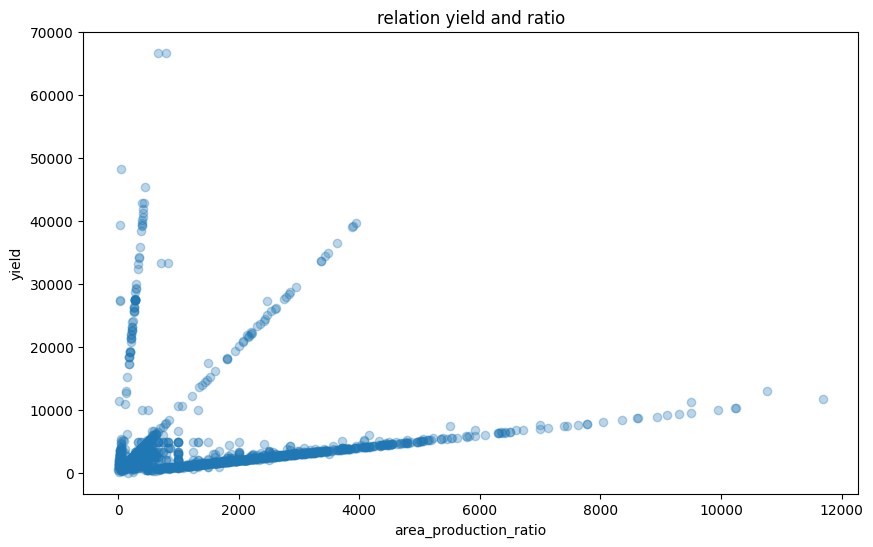

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=itr_pz['COTTON YIELD (Kg per ha)'],x=itr_pz['cotton_ratio'],alpha=0.3)
plt.title("relation yield and ratio")
plt.xlabel("area_production_ratio")
plt.ylabel("yield")

Text(0, 0.5, 'yield')

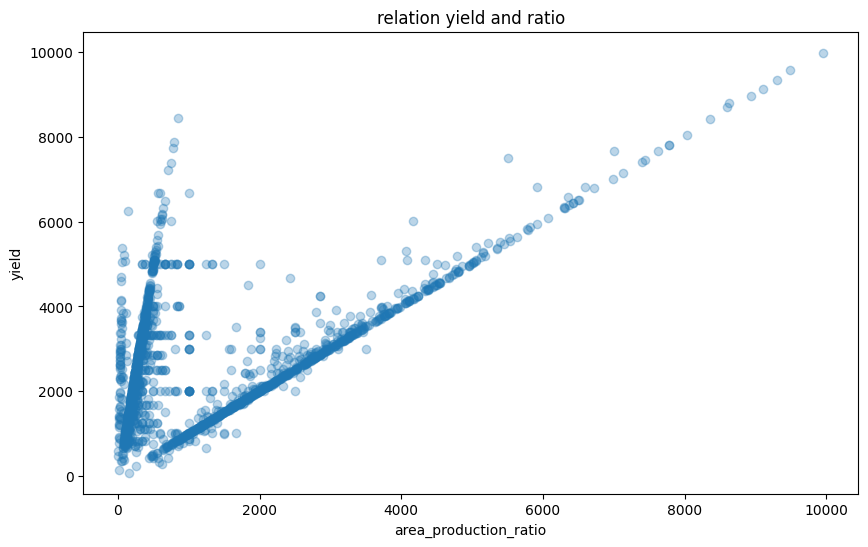

In [ ]:
y_b_10k = itr_pz[itr_pz['COTTON YIELD (Kg per ha)']<10000]
y_b_10k.shape
plt.figure(figsize=(10,6))
plt.scatter(y=y_b_10k['COTTON YIELD (Kg per ha)'],x=y_b_10k['cotton_ratio'],alpha=0.3)
plt.title("relation yield and ratio")
plt.xlabel("area_production_ratio")
plt.ylabel("yield")

In [ ]:
#so cut extreme values from yeild column

#45k

y_b_45k = itr_pz[itr_pz['COTTON YIELD (Kg per ha)']<50000]
y_b_45k.shape
y_b_45k = y_b_45k.reset_index(drop=True)
y_b_45k.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.571429
1,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.142857
2,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.384615
3,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.160643
4,1990,Andhra Pradesh,Guntur,16104.0,869.0,5371,4.23,20.38,42.80,4.10,...,64.31,49.95,22460.0,13.39,26.37,22.11,216196.0,248.23,188.03,53.961749


#ratio between taret(y) and prod/area

In [ ]:
y_b_45k['cotton_ratio'] = y_b_45k['cotton_ratio'].round(2)
its_pz['cotton_ratio'] = its_pz['cotton_ratio'].round(2)

In [ ]:
y_b_45k.shape

(2299, 104)

In [ ]:
y_b_45k['slope'] = (y_b_45k['COTTON YIELD (Kg per ha)']/y_b_45k['cotton_ratio']).round(2)
y_b_45k.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio,slope
0,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.57,7.78
1,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.14,1.02
2,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.38,1.08
3,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.16,9.97
4,1990,Andhra Pradesh,Guntur,16104.0,869.0,5371,4.23,20.38,42.80,4.10,...,49.95,22460.0,13.39,26.37,22.11,216196.0,248.23,188.03,53.96,99.54


In [ ]:
y_b_45k['slope'].value_counts()

* so the slop values are mainly 1 ,and around 10
* 75% of values in slop are below 10

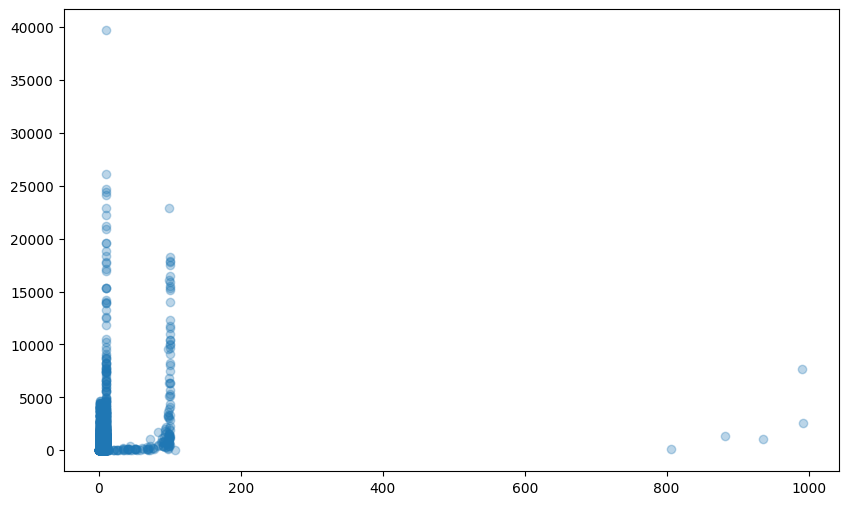

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=y_b_45k['COTTON AREA (1000 ha)'],x=y_b_45k['slope'],alpha=0.3)

In [ ]:
y_b_45k_s10 = y_b_45k[y_b_45k['slope']<11]
y_b_45k_s10.shape

(1811, 105)

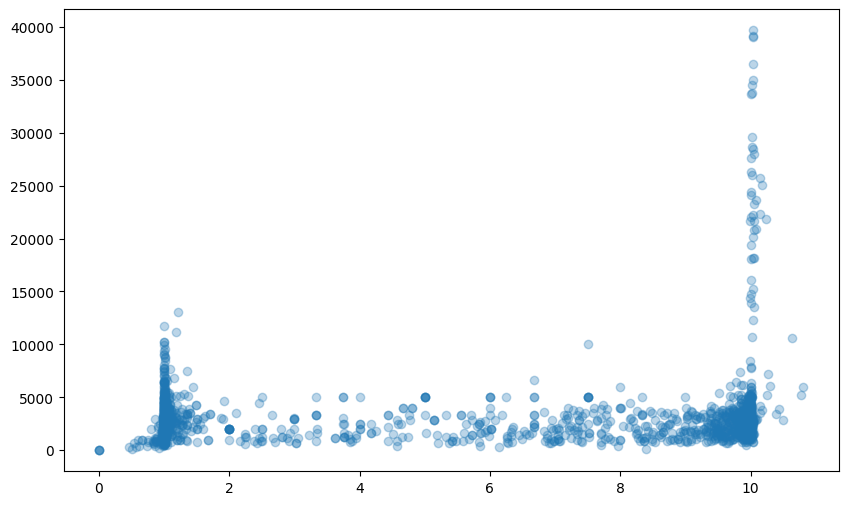

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=y_b_45k_s10['COTTON YIELD (Kg per ha)'],x=y_b_45k_s10['slope'],alpha=0.3)

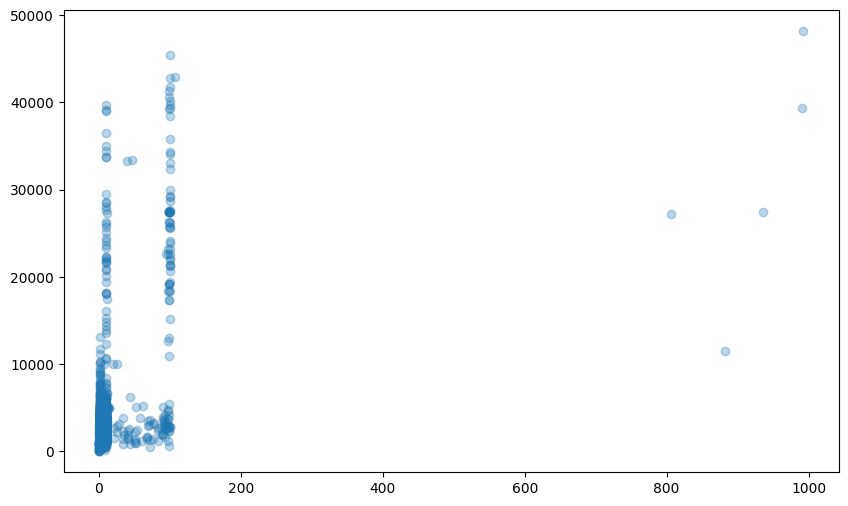

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=y_b_45k['COTTON YIELD (Kg per ha)'],x=y_b_45k['slope'],alpha=0.3)

In [ ]:
y_b_45k['slope'].describe()

count    1970.000000
mean       13.157091
std        50.745243
min         0.000000
25%         1.010000
50%         6.670000
75%         9.950000
max       992.600000
Name: slope, dtype: float64

In [ ]:
y_b_45k.shape

(2299, 105)

In [ ]:
y_b_45k[y_b_45k.slope<5]

#findings about slope

* values are mainly distributed between 1 and 10
* there is two main cluster in 1 and 10

* we need to find the influence of othere var in taret var

#model

In [ ]:
y_b_45k.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio,slope
0,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.57,7.78
1,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.14,1.02
2,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.38,1.08
3,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.16,9.97
4,1990,Andhra Pradesh,Guntur,16104.0,869.0,5371,4.23,20.38,42.80,4.10,...,49.95,22460.0,13.39,26.37,22.11,216196.0,248.23,188.03,53.96,99.54


In [ ]:
its_pz.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,2007,Andhra Pradesh,Srikakulam,179.0,124.0,0,0.0,19.53,0.0,18.03,...,28.28,20.03,NaN,17.46,NaN,15.77,64007.0,134.94,97.83,692.74
1,2007,Andhra Pradesh,Visakhapatnam,39.0,27.0,0,0.0,9.90,0.0,16.02,...,20.29,16.25,6842.0,16.00,15.44,NaN,48839.0,107.11,85.50,692.31
2,2007,Andhra Pradesh,East Godavari,81.0,316.0,0,0.0,7.00,NaN,12.87,...,91.41,53.02,29651.0,21.68,68.70,39.54,158750.0,366.49,NaN,3901.23
3,2007,Andhra Pradesh,West Godavari,49.0,309.0,0,0.0,5.13,NaN,8.27,...,149.91,96.38,50048.0,22.00,117.34,74.79,250292.0,568.85,355.04,6306.12
4,2007,Andhra Pradesh,Krishna,3479.0,1956.0,0,0.0,6.71,0.0,9.97,...,NaN,74.52,32780.0,19.03,69.82,46.43,192459.0,408.09,264.86,562.23


In [ ]:
#kfold
y_b_45k['kfold'] = -1
from sklearn import model_selection
kf=model_selection.KFold(n_splits=6,shuffle=True,random_state=42)
for fold ,(train_indicies,valid_indicies) in enumerate(kf.split(X=y_b_45k)):
  y_b_45k.loc[valid_indicies,'kfold']=fold

In [ ]:
y_b_45k.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio,slope,kfold,id
0,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,4.03,5.67,3.11,44809.0,90.08,73.74,428.57,7.78,3,0
1,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,6.86,19.71,13.31,NaN,303.24,194.95,4857.14,1.02,5,1
2,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,14.01,42.18,33.22,165898.0,375.97,266.35,4615.38,1.08,2,2
3,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,13.34,29.04,21.79,139778.0,NaN,193.57,290.16,9.97,3,3
4,1990,Andhra Pradesh,Guntur,16104.0,869.0,5371,4.23,20.38,42.80,4.10,...,13.39,26.37,22.11,216196.0,248.23,188.03,53.96,99.54,5,4


In [ ]:
y_b_45k.kfold.value_counts()

0    384
3    383
5    383
2    383
1    383
4    383
Name: kfold, dtype: int64

In [ ]:
y_b_45k['id'] = y_b_45k.index

In [ ]:
ff = ['slope','kfold','id']
useful_feature=[c for c in y_b_45k.columns if c not in ff]
useful_feature

['Year',
 'State Name',
 'Dist Name',
 'COTTON AREA (1000 ha)',
 'COTTON PRODUCTION (1000 tons)',
 'COTTON YIELD (Kg per ha)',
 'JANUARY PERCIPITATION (Millimeters)',
 'FEBRUARY PERCIPITATION (Millimeters)',
 'MARCH PERCIPITATION (Millimeters)',
 'APRIL PERCIPITATION (Millimeters)',
 'MAY PERCIPITATION (Millimeters)',
 'JUNE PERCIPITATION (Millimeters)',
 'JULY PERCIPITATION (Millimeters)',
 'AUGUST PERCIPITATION (Millimeters)',
 'SEPTEMBER PERCIPITATION (Millimeters)',
 'OCTOBER PERCIPITATION (Millimeters)',
 'NOVEMBER PERCIPITATION (Millimeters)',
 'DECEMBER PERCIPITATION (Millimeters)',
 'JANUARY MINIMUM (Centigrate)',
 'FEBRUARY MINIMUM (Centigrate)',
 'MARCH MINIMUM (Centigrate)',
 'APRIL MINIMUM (Centigrate)',
 'MAY MINIMUM (Centigrate)',
 'JUNE MINIMUM (Centigrate)',
 'JULY MINIMUM (Centigrate)',
 'AUGUST MINIMUM (Centigrate)',
 'SEPTEMBER MINIMUM (Centigrate)',
 'OCTOBER MINIMUM (Centigrate)',
 'NOVEMBER MINIMUM (Centigrate)',
 'DECEMBER MINIMUM (Centigrate)',
 'JANUARY MAXIMUM

In [ ]:
sub_new = pd.DataFrame()

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor, Pool

In [ ]:
useful_feature

['Year',
 'State Name',
 'Dist Name',
 'COTTON AREA (1000 ha)',
 'COTTON PRODUCTION (1000 tons)',
 'COTTON YIELD (Kg per ha)',
 'JANUARY PERCIPITATION (Millimeters)',
 'FEBRUARY PERCIPITATION (Millimeters)',
 'MARCH PERCIPITATION (Millimeters)',
 'APRIL PERCIPITATION (Millimeters)',
 'MAY PERCIPITATION (Millimeters)',
 'JUNE PERCIPITATION (Millimeters)',
 'JULY PERCIPITATION (Millimeters)',
 'AUGUST PERCIPITATION (Millimeters)',
 'SEPTEMBER PERCIPITATION (Millimeters)',
 'OCTOBER PERCIPITATION (Millimeters)',
 'NOVEMBER PERCIPITATION (Millimeters)',
 'DECEMBER PERCIPITATION (Millimeters)',
 'JANUARY MINIMUM (Centigrate)',
 'FEBRUARY MINIMUM (Centigrate)',
 'MARCH MINIMUM (Centigrate)',
 'APRIL MINIMUM (Centigrate)',
 'MAY MINIMUM (Centigrate)',
 'JUNE MINIMUM (Centigrate)',
 'JULY MINIMUM (Centigrate)',
 'AUGUST MINIMUM (Centigrate)',
 'SEPTEMBER MINIMUM (Centigrate)',
 'OCTOBER MINIMUM (Centigrate)',
 'NOVEMBER MINIMUM (Centigrate)',
 'DECEMBER MINIMUM (Centigrate)',
 'JANUARY MAXIMUM

In [ ]:
cat_features_new=['Year',
 'State Name',
 'Dist Name',]

In [ ]:
df['COTTON YIELD (Kg per ha)'].describe()

count     2299.000000
mean      3863.062201
std       6036.313809
min          0.000000
25%       1504.000000
50%       2411.000000
75%       3502.000000
max      48151.000000
Name: COTTON YIELD (Kg per ha), dtype: float64

In [ ]:
df=y_b_45k.copy()
scores=[]
test_r=its_pz[useful_feature]
final_test_pr=[]
final_valid_pr={}

for fold in range(6):
  xtrain=df[df.kfold!=fold].reset_index(drop=True)
  xvalid=df[df.kfold==fold].reset_index(drop=True)
  #
  valid_ids=xvalid.id.values.tolist()

  ytrain=xtrain['COTTON YIELD (Kg per ha)']
  yvalid=xvalid['COTTON YIELD (Kg per ha)']

  xtrain=xtrain[useful_feature]
  xvalid=xvalid[useful_feature]


  lgbm = CatBoostRegressor(iterations = 4000,random_seed=123, cat_features=cat_features_new)
  lgbm.fit(xtrain, ytrain ,eval_set=[(xvalid, yvalid)],verbose=20, use_best_model=True, early_stopping_rounds=100)

  valid_pred = lgbm.predict(xvalid)  #predicting for the valid set add some time to the process

  rmse=mean_squared_error(yvalid,valid_pred)
  print(fold,rmse)
  #print(fold)
  #print("RMSLE LGBM: ", sqrt((mean_squared_error((yvalid),(valid_pred)))))

  test_p=lgbm.predict(test_r)  #predicting test set
  final_test_pr.append(test_p)

  #final_valid_pr.update(dict(zip(valid_ids,valid_pred)))

  scores.append(rmse)

print(np.mean(scores),np.std(scores))

#final_valid_pred=pd.DataFrame.from_dict(final_valid_pr ,orient="index").reset_index()
#final_valid_pred.columns=['id','pred_3']
#final_valid_pred.to_csv('valid_pr_3.csv',index=False)
sub_new['id'] = its_pz['id']
sub_new['pred_3']=np.mean(np.column_stack(final_test_pr),axis=1)

Learning rate set to 0.024207
0:	learn: 6022.3997850	test: 5544.9329805	best: 5544.9329805 (0)	total: 197ms	remaining: 13m 6s
20:	learn: 4280.6151072	test: 4114.1131899	best: 4114.1131899 (20)	total: 3.22s	remaining: 10m 10s
40:	learn: 3096.4619000	test: 3107.2628459	best: 3107.2628459 (40)	total: 5.39s	remaining: 8m 40s
60:	learn: 2239.3857079	test: 2340.1772852	best: 2340.1772852 (60)	total: 7.33s	remaining: 7m 53s
80:	learn: 1610.7430131	test: 1748.3671870	best: 1748.3671870 (80)	total: 8.79s	remaining: 7m 5s
100:	learn: 1176.8207061	test: 1347.2019832	best: 1347.2019832 (100)	total: 10.4s	remaining: 6m 42s
120:	learn: 889.9727141	test: 1068.8320124	best: 1068.8320124 (120)	total: 11.9s	remaining: 6m 22s
140:	learn: 693.6603199	test: 882.0335132	best: 882.0335132 (140)	total: 14s	remaining: 6m 23s
160:	learn: 552.1593421	test: 754.6568601	best: 754.6568601 (160)	total: 16.2s	remaining: 6m 27s
180:	learn: 452.5467564	test: 666.5003262	best: 666.5003262 (180)	total: 18.3s	remaining: 6

In [ ]:
sub_new['COTTON YIELD (Kg per ha)'] = np.where(sub_new.pred_3<0,0,sub_new.pred_3)

In [ ]:
sub_new

,id,pred_3,COTTON YIELD (Kg per ha)
0,0,217.672040,217.672040
1,1,178.444623,178.444623
2,2,359.796704,359.796704
3,3,509.829007,509.829007
4,4,606.182044,606.182044
...,...,...,...
1123,2416,189.083642,189.083642
1124,2417,266.573747,266.573747
1125,2418,271.406833,271.406833
1126,2419,252.880288,252.880288


In [ ]:
final_test_pr

[array([207.14534121, 114.32080176, 359.06094582, ..., 198.38778734,
        190.58771908,  29.2014953 ]),
 array([276.39225347, 236.38478157, 394.69571486, ..., 340.5296223 ,
        274.02224301,  89.6715811 ]),
 array([171.90577786, 148.85323223, 310.28142776, ..., 249.96172088,
        229.89616384,  44.22370547]),
 array([203.11635767, 149.7071356 , 266.87123767, ..., 232.27820365,
        244.45248364,  77.58942491]),
 array([241.16223737, 204.95690072, 458.42575944, ..., 319.42310066,
        312.12367348, 114.74912662]),
 array([206.31027017, 216.44488471, 369.44513841, ..., 287.86056417,
        266.19944274, 136.36829008])]

In [ ]:
sub_new.describe()

,id,pred_3,COTTON YIELD (Kg per ha)
count,1128.000000,1128.000000,1128.000000
mean,1198.362589,344.690793,344.776138
std,713.131997,142.962538,142.749435
min,0.000000,-28.320120,0.000000
25%,564.750000,244.698137,244.698137
50%,1190.500000,339.417108,339.417108
75%,1819.250000,448.740491,448.740491
max,2471.000000,805.736558,805.736558


In [ ]:
india_t = pd.merge(india_test,sub_new[['id','COTTON YIELD (Kg per ha)']],how='outer',on=['id'])
india_t

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha)_x,JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio,id,COTTON YIELD (Kg per ha)_y
0,2007,Andhra Pradesh,Srikakulam,179.0,124.0,0,0.00,19.53,0.00,18.03,...,NaN,17.46,NaN,15.77,64007.0,134.94,97.83,692.737430,0,217.672040
1,2007,Andhra Pradesh,Visakhapatnam,39.0,27.0,0,0.00,9.90,0.00,16.02,...,6842.0,16.00,15.44,NaN,48839.0,107.11,85.50,692.307692,1,178.444623
2,2007,Andhra Pradesh,East Godavari,81.0,316.0,0,0.00,7.00,NaN,12.87,...,29651.0,21.68,68.70,39.54,158750.0,366.49,NaN,3901.234568,2,359.796704
3,2007,Andhra Pradesh,West Godavari,49.0,309.0,0,0.00,5.13,NaN,8.27,...,50048.0,22.00,117.34,74.79,250292.0,568.85,355.04,6306.122449,3,509.829007
4,2007,Andhra Pradesh,Krishna,3479.0,1956.0,0,0.00,6.71,0.00,9.97,...,32780.0,19.03,69.82,46.43,192459.0,408.09,264.86,562.230526,4,606.182044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,2015,West Bengal,Jalpaiguri,0.0,NaN,0,NaN,33.91,28.31,181.83,...,30574.0,28.84,94.70,55.89,123077.0,369.16,217.97,NaN,2471,81.967271
2472,2015,West Bengal,Darjeeling,0.0,0.0,0,29.89,47.23,33.53,191.11,...,0.0,0.00,0.00,0.00,0.0,0.00,0.00,NaN,2472,NaN
2473,2015,West Bengal,Malda,0.0,0.0,0,26.29,NaN,15.06,53.32,...,17626.0,20.92,75.39,41.51,NaN,441.58,222.66,NaN,2473,NaN
2474,2015,West Bengal,Cooch Behar,0.0,0.0,0,19.89,20.83,24.05,148.61,...,8378.0,19.84,33.75,18.12,46960.0,185.62,93.36,NaN,2474,NaN


In [ ]:
test_pp = india_t[['id','COTTON AREA (1000 ha)','COTTON PRODUCTION (1000 tons)','cotton_ratio','COTTON YIELD (Kg per ha)_y']]
test_pp

,id,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),cotton_ratio,COTTON YIELD (Kg per ha)_y
0,0,179.0,124.0,692.737430,217.672040
1,1,39.0,27.0,692.307692,178.444623
2,2,81.0,316.0,3901.234568,359.796704
3,3,49.0,309.0,6306.122449,509.829007
4,4,3479.0,1956.0,562.230526,606.182044
...,...,...,...,...,...
2471,2471,0.0,NaN,NaN,81.967271
2472,2472,0.0,0.0,NaN,NaN
2473,2473,0.0,0.0,NaN,NaN
2474,2474,0.0,0.0,NaN,NaN


In [ ]:
test_pp['COTTON YIELD (Kg per ha)_y'] = test_pp['COTTON YIELD (Kg per ha)_y'].fillna(0)

<ipython-input-80-9169b663f750>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pp['COTTON YIELD (Kg per ha)_y'] = test_pp['COTTON YIELD (Kg per ha)_y'].fillna(0)


In [ ]:
test_pp

,id,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),cotton_ratio,COTTON YIELD (Kg per ha)_y
0,0,179.0,124.0,692.737430,217.672040
1,1,39.0,27.0,692.307692,178.444623
2,2,81.0,316.0,3901.234568,359.796704
3,3,49.0,309.0,6306.122449,509.829007
4,4,3479.0,1956.0,562.230526,606.182044
...,...,...,...,...,...
2471,2471,0.0,NaN,NaN,81.967271
2472,2472,0.0,0.0,NaN,0.000000
2473,2473,0.0,0.0,NaN,0.000000
2474,2474,0.0,0.0,NaN,0.000000


In [ ]:
test_pp.to_csv('in_tp.csv',index=False)

In [ ]:
final_test_pr

In [ ]:
sub_new['id'] = its_pz['id']
sub_new['pred_3']=np.mean(np.column_stack(final_test_pr),axis=1)

In [ ]:
sub_new

In [ ]:
sub_new.describe()

,id,pred_3
count,1128.000000,1128.000000
mean,1198.362589,345.199032
std,713.131997,167.114480
min,0.000000,-91.570846
25%,564.750000,229.384908
50%,1190.500000,322.149108
75%,1819.250000,447.791569
max,2471.000000,882.332564


In [ ]:
sub_new[sub_new.pred_3<0]

,id,pred_3
572,1204,-14.694309
575,1222,-4.195089
783,1677,-26.200636
926,2011,-28.320120
1006,2194,-22.858679


In [ ]:
sub_new.shape

(1128, 1)

In [ ]:
sub_new['COTTON YIELD (Kg per ha)'] = np.where(sub_new.pred_3<0,0,sub_new.pred_3)

In [ ]:
sub_new['COTTON YIELD (Kg per ha)'].describe()

count    1128.000000
mean      345.534723
std       166.360132
min         0.000000
25%       229.384908
50%       322.149108
75%       447.791569
max       882.332564
Name: COTTON YIELD (Kg per ha), dtype: float64

In [ ]:
india_test.shape

(2476, 104)

In [ ]:
sub_new.shape

(1128, 2)

In [ ]:
sub_new['COTTON YIELD (Kg per ha)'] = sub_new[sub_new.pred_3<0]

#train USA data

In [ ]:
usa_train['Planted (1000 Acres)'].values

In [ ]:
usa_train = pd.read_csv("USA_train.csv")
usa_test = pd.read_csv("USA_test.csv")

In [ ]:
usa_train.shape

(560, 25)

In [ ]:
usa_train.head()

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,1975,AL,385,370,406,66.825000,1.566667,75.066667,2.266667,54.566667,...,224.916667,-1.083333,8.161667,6.840833,NaN,4.684167,6.132500,5.821667,4.857500,2.718333
1,1975,NaN,700,680,486,63.875000,2.225000,73.808333,1.208333,52.975000,...,299.250000,8.750000,6.674167,6.331667,5.414167,4.894167,5.098333,3.680000,1.537500,3.382500
2,1975,AZ,NaN,268,1028,61.891667,-0.733333,74.483333,-0.291667,45.283333,...,211.166667,43.416667,0.584167,0.403333,1.584167,0.375000,1.140833,2.805000,3.648333,0.893333
3,1975,CA,900,875,1074,NaN,-0.383333,72.700000,-0.466667,46.825000,...,303.083333,NaN,2.650000,4.479167,1.613333,4.324167,1.405000,2.100833,3.068333,2.322500
4,1975,FL,4,4,347,73.208333,4.133333,83.983333,2.308333,64.408333,...,49.916667,-6.666667,1.191667,1.801667,4.085000,1.762500,2.155000,1.778333,3.239167,3.455833


* in usa_train data if Planted (1000 Acres)=nan and Harvested (1000 Acres)=0
then  Yield (Pounds/ Harvested Area)=0

* in usa_train data if Planted (1000 Acres)=0 and Harvested (1000 Acres)=NAN
then  Yield (Pounds/ Harvested Area)=0

* lets drop those rows

**when Planted (1000 Acres)==0 and Harvested (1000 Acres)==0 then  Yield (Pounds/ Harvested Area)=0 always**

In [ ]:
usa_train[usa_train['Planted (1000 Acres)'].isnull()]

In [ ]:
z = usa_train[usa_train['Harvested (1000 Acres)']=='0']
z

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
6,1975,IL,0,0,0,52.983333,3.733333,63.750000,NaN,46.225000,...,525.000000,6.166667,3.544167,1.652500,3.165833,4.084167,2.876667,2.972500,1.561667,1.236667
7,1975,KS,0,0,0,55.725000,NaN,69.225000,2.925000,45.208333,...,437.583333,19.750000,2.863333,2.080833,2.417500,1.554167,2.158333,1.339167,2.283333,2.047500
26,1976,IL,0,0,0,54.375000,NaN,63.775000,0.383333,40.950000,...,569.750000,NaN,3.060833,1.169167,1.383333,0.301667,2.119167,NaN,2.165000,1.840000
27,1976,KS,0,0,0,55.200000,0.433333,70.941667,1.641667,44.458333,...,427.750000,12.916667,3.300000,0.517500,0.300000,2.436667,0.334167,2.515000,3.348333,3.112500
46,1977,IL,0,0,0,54.508333,0.258333,63.750000,3.358333,44.241667,...,548.666667,31.833333,1.259167,-0.632500,3.037500,-0.044167,0.272500,0.368333,2.348333,3.023333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,2001,IL,NaN,0,0,56.358333,3.108333,67.658333,5.266667,47.100000,...,479.333333,-38.500000,4.665000,0.773333,NaN,0.478333,1.521667,2.617500,1.446667,4.121667
528,2001,KY,0,0,0,60.591667,3.708333,68.958333,2.116667,NaN,...,353.583333,-23.000000,1.604167,-0.236667,-0.143333,-0.149167,0.195833,0.359167,4.030833,3.699167
534,2001,NaN,0,0,0,52.558333,2.900000,69.350000,4.183333,40.750000,...,292.333333,-3.333333,-1.180000,0.559167,-2.180000,-0.569167,-1.064167,-0.500000,2.870833,0.070833
546,2002,IL,0,0,0,57.241667,2.991667,65.400000,2.008333,46.058333,...,504.166667,-15.666667,1.347500,NaN,4.328333,3.246667,2.929167,NaN,1.976667,1.651667


In [ ]:
usa_train[(usa_train['Planted (1000 Acres)'].isnull())&(usa_train['Harvested (1000 Acres)']=='0')]

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
68,1978,KY,NaN,0,0,55.366667,-0.516667,67.225000,-0.616667,NaN,...,452.916667,75.333333,3.495833,2.655000,NaN,4.490000,1.523333,3.686667,3.621667,4.290000
334,1991,NV,NaN,0,0,51.891667,1.233333,64.191667,1.025000,40.575000,...,310.916667,16.250000,0.252500,0.991667,-1.747500,-1.136667,0.941667,2.505833,0.530833,2.730833
428,1996,KY,NaN,0,0,56.400000,2.516667,67.075000,0.233333,45.708333,...,411.416667,35.833333,5.917500,5.076667,3.917500,4.911667,2.838333,5.001667,3.349167,5.017500
526,2001,IL,NaN,0,0,56.358333,3.108333,67.658333,5.266667,47.100000,...,479.333333,-38.500000,4.665000,0.773333,NaN,0.478333,1.521667,2.617500,1.446667,4.121667
548,2002,KY,NaN,0,0,58.833333,2.950000,71.575000,1.733333,47.108333,...,NaN,-9.333333,1.995000,1.154167,2.289167,4.283333,3.034167,3.197500,2.560833,1.229167


In [ ]:
z_1 = usa_train[~((usa_train['Planted (1000 Acres)'].isnull())&(usa_train['Harvested (1000 Acres)']=='0'))]
print(z_1.shape)
z_2 = z_1[~((z_1['Harvested (1000 Acres)'].isnull())&(z_1['Planted (1000 Acres)']=='0'))]
print(z_2.shape)
z_3 =z_2[~((z_2['Harvested (1000 Acres)']=='0')&(z_2['Planted (1000 Acres)']=='0'))]
z_3.shape

(555, 25)
(552, 25)


(473, 25)

In [ ]:
z_3 =z_2[~((z_2['Harvested (1000 Acres)']=='0')&(z_2['Planted (1000 Acres)']=='0'))]
z_3.shape

(473, 25)

In [ ]:
z_3[z_3['Yield (Pounds/ Harvested Area)']==0]

In [ ]:
z_3['Harvested (1000 Acres)'].fillna(-9999)

In [ ]:
z_nan = z_3.copy()
z_nan['Harvested (1000 Acres)'] = z_3['Harvested (1000 Acres)'].fillna(-9999)
z_nan['Planted (1000 Acres)'] = z_nan['Planted (1000 Acres)'].fillna(-9999)
z_nan.head()

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,1975,AL,385,370,406,66.825000,1.566667,75.066667,2.266667,54.566667,...,224.916667,-1.083333,8.161667,6.840833,NaN,4.684167,6.132500,5.821667,4.857500,2.718333
1,1975,NaN,700,680,486,63.875000,2.225000,73.808333,1.208333,52.975000,...,299.250000,8.750000,6.674167,6.331667,5.414167,4.894167,5.098333,3.680000,1.537500,3.382500
2,1975,AZ,-9999,268,1028,61.891667,-0.733333,74.483333,-0.291667,45.283333,...,211.166667,43.416667,0.584167,0.403333,1.584167,0.375000,1.140833,2.805000,3.648333,0.893333
3,1975,CA,900,875,1074,NaN,-0.383333,72.700000,-0.466667,46.825000,...,303.083333,NaN,2.650000,4.479167,1.613333,4.324167,1.405000,2.100833,3.068333,2.322500
4,1975,FL,4,4,347,73.208333,4.133333,83.983333,2.308333,64.408333,...,49.916667,-6.666667,1.191667,1.801667,4.085000,1.762500,2.155000,1.778333,3.239167,3.455833


In [ ]:
type(z_nan['Planted (1000 Acres)'])

pandas.core.series.Series

In [ ]:
b=[]
for i in z_nan['Planted (1000 Acres)']:
  i = str(i)
  j = i.replace(",", "")
  print(j)
  j=int(j)
  b.append(j)

In [ ]:
c=[]
for i in z_nan['Harvested (1000 Acres)']:
  i = str(i)
  j = i.replace(",", "")
  print(j)
  j=int(j)
  c.append(j)

In [ ]:
z_nan['Planted (1000 Acres)']=b
z_nan['Harvested (1000 Acres)'] = c

In [ ]:
z_nan['ratio'] = z_nan['Planted (1000 Acres)']/z_nan['Harvested (1000 Acres)']
z_nan

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,...,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly,ratio
0,1975,AL,385,370,406,66.825000,1.566667,75.066667,2.266667,54.566667,...,-1.083333,8.161667,6.840833,NaN,4.684167,6.132500,5.821667,4.857500,2.718333,1.040541
1,1975,NaN,700,680,486,63.875000,2.225000,73.808333,1.208333,52.975000,...,8.750000,6.674167,6.331667,5.414167,4.894167,5.098333,3.680000,1.537500,3.382500,1.029412
2,1975,AZ,-9999,268,1028,61.891667,-0.733333,74.483333,-0.291667,45.283333,...,43.416667,0.584167,0.403333,1.584167,0.375000,1.140833,2.805000,3.648333,0.893333,-37.309701
3,1975,CA,900,875,1074,NaN,-0.383333,72.700000,-0.466667,46.825000,...,NaN,2.650000,4.479167,1.613333,4.324167,1.405000,2.100833,3.068333,2.322500,1.028571
4,1975,FL,4,4,347,73.208333,4.133333,83.983333,2.308333,64.408333,...,-6.666667,1.191667,1.801667,4.085000,1.762500,2.155000,1.778333,3.239167,3.455833,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2002,OK,200,180,560,60.416667,2.433333,75.133333,1.116667,50.708333,...,11.916667,4.065000,0.377500,1.434167,1.620833,1.524167,NaN,3.279167,4.037500,1.111111
556,2002,NaN,290,200,316,65.700000,1.683333,76.058333,2.625000,53.325000,...,-1.666667,NaN,0.236667,-1.291667,-0.115833,-0.941667,-0.740000,2.412500,1.468333,1.450000
557,2002,TN,565,530,743,61.725000,1.683333,72.566667,4.408333,48.841667,...,-2.500000,3.680000,0.880833,2.127500,3.180000,2.747500,3.960000,4.494167,3.199167,1.066038
558,2002,TX,5600,4500,541,67.025000,2.716667,80.941667,0.333333,57.100000,...,8.750000,4.174167,1.235833,0.911667,1.660833,1.031667,2.886667,4.301667,3.251667,1.244444


* since the relation

In [ ]:
z_nan.shape

(473, 25)

In [ ]:
z_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 0 to 559
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              473 non-null    int64  
 1   State                                             448 non-null    object 
 2   Planted (1000 Acres)                              473 non-null    int64  
 3   Harvested (1000 Acres)                            473 non-null    int64  
 4   Yield (Pounds/ Harvested Area)                    473 non-null    int64  
 5   Average Temperature Value                         447 non-null    float64
 6   Average Temperature Anomaly                       448 non-null    float64
 7   Maximum Temperature Value                         457 non-null    float64
 8   Maximum Temperature Anomaly                       448 non-null    float64
 9   Minimum Temperature V

In [ ]:
z_nan['Planted (1000 Acres)'] = pd.to_numeric(z_nan['Planted (1000 Acres)'])
z_nan['Harvested (1000 Acres)'] = pd.to_numeric(z_nan['Harvested (1000 Acres)'])
z_nan.infO()

ValueError: ignored

In [ ]:
z_2[z_2['Yield (Pounds/ Harvested Area)']==0]

In [ ]:
o = z_2[(z_2['Harvested (1000 Acres)']=='0')&(z_2['Planted (1000 Acres)']=='0')]
o

In [ ]:
o.describe()

In [ ]:
#usa_train['Planted (1000 Acres)'] = pd.to_numeric(usa_train['Planted (1000 Acres)'], errors='coerce')
#usa_train['Harvested (1000 Acres)'] = pd.to_numeric(usa_train['Harvested (1000 Acres)'], errors='coerce')
usa_train.info()

In [ ]:
usa_train[usa_train['Harvested (1000 Acres)'].isna()]

In [ ]:
usa_train[usa_train['Planted (1000 Acres)'].isna()]

In [ ]:
usa_train.head()

In [ ]:
usa_train.info()

* our next step is to get ratio value of area and harvest ,
* We need to convert both col into number
* Before that deal with Nan value
* Convert them into a unique value then convert cols into numberic

In [ ]:
usa_train['ratio'] = (usa_train['Planted (1000 Acres)']/usa_train['Planted (1000 Acres)']).round(2)

In [ ]:
usa_test.head()

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,2003,AL,525,510,0,66.733333,1.475000,75.833333,1.033333,55.633333,...,237.833333,8.833333,5.057500,4.736667,5.936667,5.459167,6.582500,3.271667,5.014167,2.875000
1,2003,AR,980,945,0,61.266667,3.616667,74.966667,0.366667,53.558333,...,292.083333,4.583333,4.019167,2.676667,1.060000,2.540000,2.038333,0.620000,0.772500,0.617500
2,2003,AZ,215,213,0,62.900000,4.275000,78.158333,4.383333,51.641667,...,155.750000,-10.000000,-0.618333,-1.799167,-0.618333,-1.827500,0.636667,-1.699167,NaN,0.297500
3,2003,CA,550,545,0,62.425000,1.775000,74.850000,1.683333,48.991667,...,237.666667,-3.500000,2.254167,2.083333,0.785833,2.496667,1.045000,1.740833,2.925000,2.179167
4,2003,FL,NaN,92,0,NaN,3.791667,84.208333,2.533333,61.533333,...,66.500000,8.916667,3.474167,3.084167,6.261667,4.939167,5.923333,6.546667,4.397500,3.614167
